# ml lab8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

### 1. read `ex8data1.mat` data

In [3]:
data1 = scipy.io.loadmat('data/ex8data1.mat')
X = data1['X']
X_val = data1['Xval']
y_val = np.squeeze(data1['yval'])

X.shape

(307, 2)

### 2. plot data

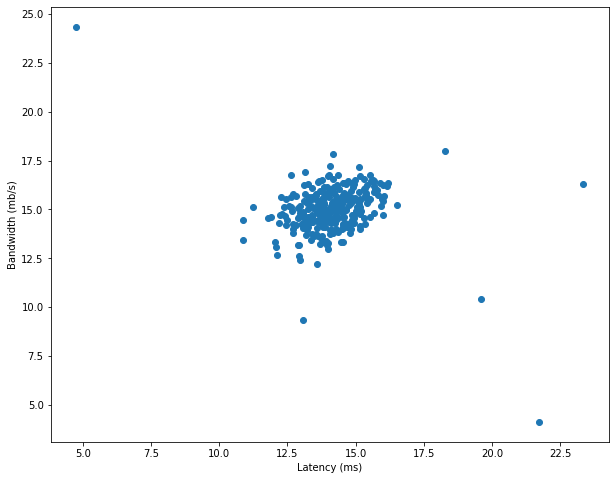

In [20]:
def plot_data():
    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1])
    ax.set_xlabel('Latency (ms)')
    ax.set_ylabel('Bandwidth (mb/s)')
    return ax
    
plot_data()

### 3-4. gaussian distributed values

In [10]:
def gaussian_params(X):
    m = X.shape[0]
    mu = (1 / m) * np.sum(X, axis=0)
    sigma2 = (1 / m) * np.sum((X - mu) ** 2, axis=0)
    return mu, sigma2

mu, sigma2 = gaussian_params(X)
print(f'Mu:\t{mu}\nsigma^2: {sigma2}')

Mu:	[14.11222578 14.99771051]
sigma^2: [1.83263141 1.70974533]


In [11]:
def gaussian_distribution(X, mu, sigma2):
    xmu2 = (X - mu.T) ** 2
    xmu2sg = xmu2 / sigma2.T
    
    exp = np.exp(-0.5 * xmu2sg)
    dn = np.sqrt(2 * np.pi * sigma2.T)
    
    p = exp / dn
    p = np.product(p, axis=1)
    return p

### 5. distribution density plot

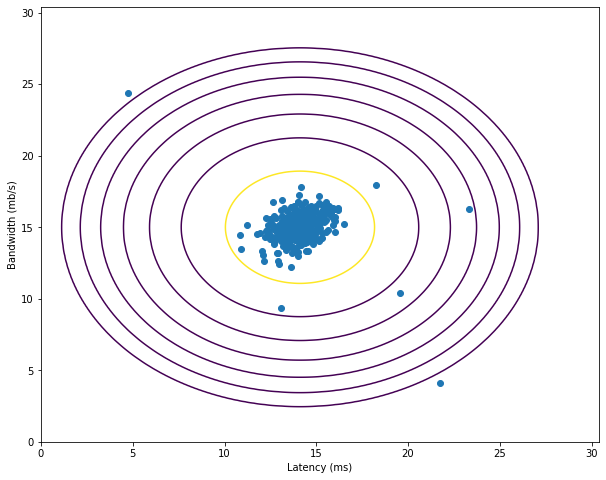

In [28]:
def plot_distribution():
    mu, sigma2 = gaussian_params(X)
    X1, X2 = np.meshgrid(np.arange(0, 30.5, 0.1), np.arange(0, 30.5, 0.1))
    Z = gaussian_distribution(np.stack([X1.ravel(), X2.ravel()], axis=1), mu, sigma2)
    Z = Z.reshape(X1.shape)

    ax = plot_data()
    ax.contour(X1, X2, Z, 10.**np.arange(-21, -2, 3))
    return ax

plot_distribution()

### 6. anomaly threshold with `F1-measure`

In [22]:
def compute_threshold(yval, pval):
    best_f1 = 0
    best_eps = 0
    eps_values = np.linspace(1.01 * np.min(pval), np.max(pval), 1000)
    
    for eps in eps_values:
        predictions = (pval < eps)
        
        tp = np.sum((predictions == yval) & (yval == 1))
        fp = np.sum((predictions == 1) & (yval == 0))
        fn = np.sum((predictions == 0) & (yval == 1))
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        f1 = 2 * prec * rec / (prec + rec)
        
        if f1 > best_f1:
            best_f1 = f1
            best_eps = eps

    return best_eps, best_f1

In [27]:
mu, sigma2 = gaussian_params(X)
p_val = gaussian_distribution(X_val, mu, sigma2)

eps, f1 = compute_threshold(y_val, p_val)
print(f'epsilon:\t{eps}\nF1:\t\t{f1}')

epsilon:	8.999852631901397e-05
F1:		0.8750000000000001


### 7. show anomalies

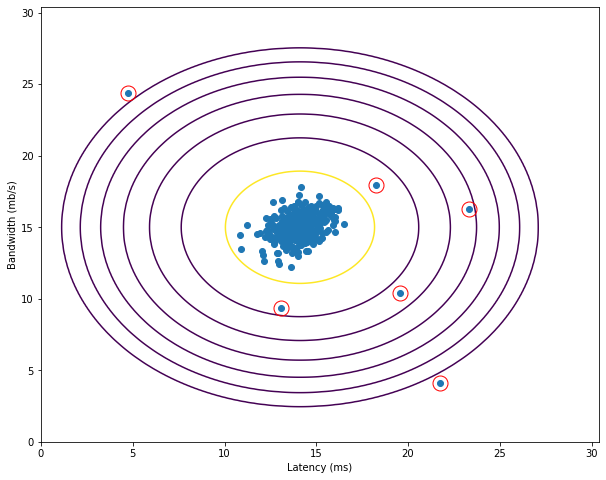

In [30]:
p = gaussian_distribution(X, mu, sigma2)
anomalies = p < eps

ax = plot_distribution()
plt.plot(X[anomalies, 0], X[anomalies, 1], 'ro', ms=15, mfc='None', mew=1)

### 7. read `ex8data2.mat` data

In [31]:
data2 = scipy.io.loadmat('data/ex8data2.mat')
X = data2['X']
X_val = data2['Xval']
y_val = np.squeeze(data2['yval'])

X.shape

(1000, 11)

### 9-10. gaussian distributed values

mu, sigma2 = gaussian_params(X)
print(f'Mu:\n{mu}\n\nsigma^2:\n{sigma2}')

p = gaussian_distribution(X, mu, sigma2)
p.shape

### 11. anomaly threshold

In [51]:
mu, sigma2 = gaussian_params(X)
p_val = gaussian_distribution(X_val, mu, sigma2)

eps, f1 = compute_threshold(y_val, p_val)
print(f'epsilon:\t{eps}\nF1:\t\t{f1}')

epsilon:	1.3786074987947628e-18
F1:		0.6153846153846154


### 12. get anomalies

In [52]:
anomalies = np.sum(p < eps)
print(f'Anomalies found:\t{anomalies}')

Anomalies found:	117


### 13. conclusions

Был рассмотрен метод выявления аномалий с помощью гауссовского нормального распределения. Реализованы функции нахождения параметров распределения, порогового значения аномалии. Результаты визуализированы на графиках